# Segundo avanze del PIA

## Equipo 2
                    Grupo 012, martes y jueves de 18:30 a 20:00 hrs
    Integrantes:
        1395501 Jose Pedro Treviño Hernandez
        1647656 Omar Alejandro Delgado Lozano

Buen Dia, en esta base de datos mi equipo decidio manejar la informacion de la aplicacion "Trip Advisor Hotel Reviews" para brindar una base de la infromacion que nos puede proporcionar la aplicacion en su basta cantidad de mas 10,000 opiniones de diferentes personas.

Nosotros nos apoyamos con pandas, natural lenguage toolkit y derivados que vamos a mostrar en la siguiente seccion.

# BASE DE DATOS: Trip Advisor Hotel Reviews

La base de datos de Trip Advisor Hotel Reviews contiene mas de 20,000 reseñas de diferentes hoteles ademas de calificaciones dadas por los huspedes.

In [35]:
#librerias necesarias
import pandas as pd
import seaborn as sns
import re 
import nltk 
from nltk import word_tokenize,sent_tokenize
import nltk as nlp
import matplotlib as plt
import numpy as np 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
#from smartcloud import smartCloud 
#import plotly.graph_objects as go
#import plotly.express as px
#import plotly.figure_factory as ff
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
#import plotly.express as px
import spacy
import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS 
import ktrain
from ktrain import text

from collections import Counter
%matplotlib inline

Se planea usar estas librerrias ya que son las que satisfacen las necesidades de busqueda de palabras y almacenamiento de ellas,ademas de ayudarnos para la visualizacion de datos en forma de graficos. 
por lo tanto dichas librerias son las que se estaran manejando.

### Base de datos
Aqui se despliega la base de datos que seleccionamos 
https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

In [36]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv');
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [37]:
df.shape

(20491, 2)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


La base de datos cuenta con 2 columnas la primera de tipo object, y la segunda de tipo int ademas de contar con 20491 filas x 2 columnas ya mencionadas.

In [39]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [40]:
df.isnull()

,Review,Rating
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
20486,False,False
20487,False,False
20488,False,False
20489,False,False


In [41]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

#### Primera parte del PIA
Como la base de datos solo cuenta con dos columnas, estas dos solo son necesarias, no es necesario el eliminar ni modificar las columnas ya que seran utiles para los siguientes pasos.

In [42]:
baseD = df
baseD.to_csv('baseD_editada.csv', index=False)

In [43]:
df=pd.read_csv('baseD_editada.csv');


In [44]:
df['Rating'].median() #muestra la media

4.0

In [45]:
df['Rating'].var() #muestra la varianza

1.5203624326830831

In [46]:
df['Rating'].std() #muestra la desviacion estandar

1.2330297776952035

In [47]:
review_list=[]

for review in df.Review:
    review=re.sub("[^a-zA-z]"," ",review) 
    review=review.lower()
    review=nltk.word_tokenize(review) 
    lemma=nlp.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review] 
    review=" ".join(review)
    review_list.append(review)

In [48]:
#review

In [49]:
#print(review_list)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

max_features=500

count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english") 
sparce_matrix=count_vectorizer.fit_transform(review_list).toarray()

In [51]:
sparce_matrix
count_vectorizer

CountVectorizer(max_features=500, stop_words='english')

In [52]:
palabras=print("Top {} Palabras mas usadas: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 500 Palabras mas usadas: ['able', 'absolutely', 'access', 'activity', 'actually', 'afternoon', 'air', 'airport', 'amazing', 'amenity', 'american', 'amsterdam', 'area', 'arrival', 'arrived', 'ask', 'asked', 'ate', 'attraction', 'available', 'average', 'away', 'awesome', 'bad', 'bag', 'balcony', 'bar', 'barcelona', 'basic', 'bath', 'bathroom', 'beach', 'beautiful', 'bed', 'bedroom', 'beer', 'believe', 'best', 'better', 'big', 'bit', 'block', 'book', 'booked', 'booking', 'bottle', 'breakfast', 'bring', 'brought', 'buffet', 'building', 'bus', 'business', 'busy', 'buy', 'ca', 'cab', 'cafe', 'called', 'came', 'cana', 'car', 'card', 'care', 'casino', 'center', 'central', 'centre', 'certainly', 'chair', 'change', 'charge', 'cheap', 'check', 'checked', 'cheese', 'child', 'choice', 'choose', 'chose', 'city', 'clean', 'cleaned', 'close', 'club', 'coffee', 'cold', 'come', 'comfortable', 'coming', 'comment', 'complaint', 'complimentary', 'concierge', 'conditioning', 'convenient', 'cool', 'corne

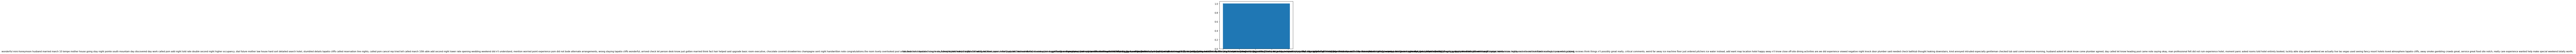

In [54]:
df['Review'].value_counts().sort_index().plot.area()

Aqui se puede observar por la cantidad de palabras usadas haciendo un conteo de las mismas para su graficacion.

In [55]:
X = df['Review'].copy()
y = df['Rating'].copy()

In [56]:
def data_cleaner(review):
    
    # remove digits
    review = re.sub(r'\d+',' ', review)
    
    #removing stop words
    review = review.split()
    review = " ".join([word for word in review if not word in stop_words])
    
    #Stemming
    #review = " ".join([ps.stem(w) for w in review])
    
    return review

ps = PorterStemmer() 
stop_words = stopwords.words('english')

X_cleaned = X.apply(data_cleaner)
X_cleaned.head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms * experience hotel monaco seattle g...
3    unique, great stay, wonderful time hotel monac...
4    great stay great stay, went seahawk game aweso...
Name: Review, dtype: object

In [57]:
pos = [4, 5]
neg = [1, 2]
neu = [3]

def sentiment(rating):
  if rating in pos:
    return 2
  elif rating in neg:
    return 0
  else:
    return 1  

In [58]:
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,2
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,2
4,"great stay great stay, went seahawk game aweso...",5,2


2 - positivo (4, 5)
1 - neutral (3)
0 - Negativo (1, 2)

In [ ]:
nlp = spacy.load('en_core_web_sm')

def normalize(msg):
    
    doc = nlp(msg)
    res = []
    
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_space):
            pass
        else:
            res.append(token.lemma_.lower())
            
    return res

se exploran las palabras para poder llegar a conclusiones en base a su escritura.

In [61]:
df['Review'] = df['Review'].apply(normalize)
df.head()

,Review,Rating,Sentiment
0,"[nice, hotel, expensive, parking, get, good, d...",4,2
1,"[ok, special, charge, diamond, member, hilton,...",2,0
2,"[nice, room, 4, experience, hotel, monaco, sea...",3,1
3,"[unique, great, stay, wonderful, time, hotel, ...",5,2
4,"[great, stay, great, stay, go, seahawk, game, ...",5,2


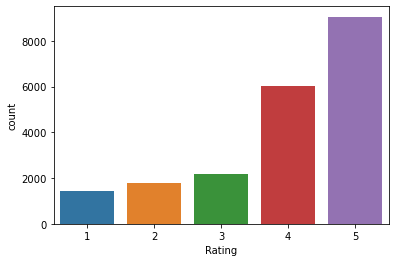

In [53]:
sns.countplot(df['Rating'])

In [ ]:
fig = go.Figure([go.Bar(x=df.Sentiment.value_counts().index, y=df.Sentiment.value_counts().tolist())])
fig.update_layout(
    title="valores de sentimiento",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

## Conclusiones Globales

Apesar de manejar las secciones de la manera mas eficiente posible, aun nos queda un tramo por recorrer, faltan modismos, percepciones y mas, pero por el momento ya podemos desmembrar las reseñas y poder concluir cuales son las que mas nos dan resultados a nuestras necesidades.
Muchos de los resultados aventados por el programa fue satisfaccion mas que alguna situacion negativa.